In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd

In [3]:
times_list = [] #[('tunnel', 't_from_start', 'duration')]
times_list.append((1, 1, 21))
times_list.append((5, 24, 3))
times_list.append((9, 30, 2))
times_list.append((1, 40, 5))

In [4]:
times_list

[(1, 1, 21), (5, 24, 3), (9, 30, 2), (1, 40, 5)]

In [5]:
times_a = np.asarray(times_list)
times_a[0][2]

21

In [6]:
tun = []
t_start = []
dura = []
for one_time in times_list:
    tun.append(one_time[0])
    t_start.append(one_time[1])
    dura.append(one_time[2])

dict = {'tunnel': tun, 't_from_start': t_start, 'duration': dura}
df = pd.DataFrame(dict)
df


,tunnel,t_from_start,duration
0,1,1,21
1,5,24,3
2,9,30,2
3,1,40,5


In [7]:
df.sort_values(by=['tunnel'], ascending = True)

,tunnel,t_from_start,duration
0,1,1,21
3,1,40,5
1,5,24,3
2,9,30,2


In [8]:
df.sort_values(by=['duration'], ascending = True)

,tunnel,t_from_start,duration
2,9,30,2
1,5,24,3
3,1,40,5
0,1,1,21


In [9]:
df['tunnel_means'] = df.tunnel.map(df.groupby(['tunnel']).duration('mean'))

TypeError: 'SeriesGroupBy' object is not callable

### Import the data from the first excel file

In [10]:
df_track = pd.read_excel('module_Times_09062020_01h08m09s.xlsx', 'Tracking', usecols = 'D,E', header = 1)
df_track.dropna(how ='any', inplace = True)
df_track['Accumulated Time'] = df_track['Accumulated Time']*4
df_track['Accumulated Time'] = df_track['Accumulated Time'].round(0)/4
df_track['T0'] = df_track['Accumulated Time'].shift(1)
df_track['T1'] = df_track['Accumulated Time']
df_track.fillna(0, inplace = True)
df_track['Ttotal'] = df_track['T1'] - df_track['T0']
df_track['Samples'] = df_track['Ttotal']/0.25
df_track['Samples'] = df_track['Samples'].astype(int)
df_track['Module #'] = df_track['Module #'].astype(int)
mod_arr = df_track['Module #'].to_numpy()
samp_arr = df_track['Samples'].to_numpy()
mod_samp = np.vstack((mod_arr, samp_arr)).T

In [11]:
df_track

,Module #,Accumulated Time,T0,T1,Ttotal,Samples
0,0,0.25,0.00,0.25,0.25,1
1,4,0.50,0.25,0.50,0.25,1
2,8,1.25,0.50,1.25,0.75,3
3,9,1.50,1.25,1.50,0.25,1
4,10,1.50,1.50,1.50,0.00,0
5,11,1.75,1.50,1.75,0.25,1
6,7,2.50,1.75,2.50,0.75,3
7,6,2.75,2.50,2.75,0.25,1
8,5,3.00,2.75,3.00,0.25,1
9,4,3.25,3.00,3.25,0.25,1


In [12]:
resamp_data = []
time_list = [] 
t_time = 0.25
for (x,y) in mod_samp:
    for i in range(y):
        resamp_data.append(x)
        time_list.append(t_time)
        t_time = t_time + 0.25
    #print(' module: ', x ,' samples: ', y)

In [13]:
#df_resamp= pd.DataFrame(resamp_data, index = time_list, columns = ['Module'])

### Importing the excel file for the second rat

In [14]:
df_track2 = pd.read_excel('module_Times_09062020_01h06m10s.xlsx', 'Tracking', usecols = 'D,E', header = 1)

In [15]:
df_track2.dropna(how ='any', inplace = True)
df_track2['Accumulated Time'] = df_track2['Accumulated Time']*4
df_track2['Accumulated Time'] = df_track2['Accumulated Time'].round(0)/4
df_track2['T0'] = df_track2['Accumulated Time'].shift(1)
df_track2['T1'] = df_track2['Accumulated Time']
df_track2.fillna(0, inplace = True)
df_track2['Ttotal'] = df_track2['T1'] - df_track2['T0']
df_track2['Samples'] = df_track2['Ttotal']/0.25
df_track2['Samples'] = df_track2['Samples'].astype(int)
df_track2['Module #'] = df_track2['Module #'].astype(int)

In [16]:
df_track2

,Module #,Accumulated Time,T0,T1,Ttotal,Samples
0,0,0.50,0.00,0.50,0.50,2
1,4,0.75,0.50,0.75,0.25,1
2,8,1.00,0.75,1.00,0.25,1
3,12,1.25,1.00,1.25,0.25,1
4,13,1.50,1.25,1.50,0.25,1
5,14,1.75,1.50,1.75,0.25,1
6,10,2.25,1.75,2.25,0.50,2
7,6,2.50,2.25,2.50,0.25,1
8,5,3.00,2.50,3.00,0.50,2
9,1,3.25,3.00,3.25,0.25,1


In [17]:
mod_arr2 = df_track2['Module #'].to_numpy()
samp_arr2 = df_track2['Samples'].to_numpy()
mod_samp2 = np.vstack((mod_arr2, samp_arr2)).T

In [18]:
resamp_data2 = []
time_list2 = [] 
t_time = 0.25
for (x,y) in mod_samp2:
    for i in range(y):
        resamp_data2.append(x)
        time_list2.append(t_time)
        t_time = t_time + 0.25

### Making both recordings of the same lenght 

In [19]:
rat1_data = []
rat2_data = []
if np.size(resamp_data2) < np.size(resamp_data):
    rat1_data = resamp_data[:np.size(resamp_data2)]
    rat2_data = resamp_data2
else:
    rat2_data = resamp_data2[:np.size(resamp_data)]
    rat1_data = resamp_data


### Obtaining the coincidences

In [20]:
equal_module = []
for pos, module in enumerate(rat1_data):
    if module == rat2_data[pos]:
        equal_module.append(module)
    else:
        equal_module.append(16)

In [21]:
number_of_coinc = []
for n in range(16):
    number_of_coinc.append(equal_module.count(n)/4)
    

### Plotting the results

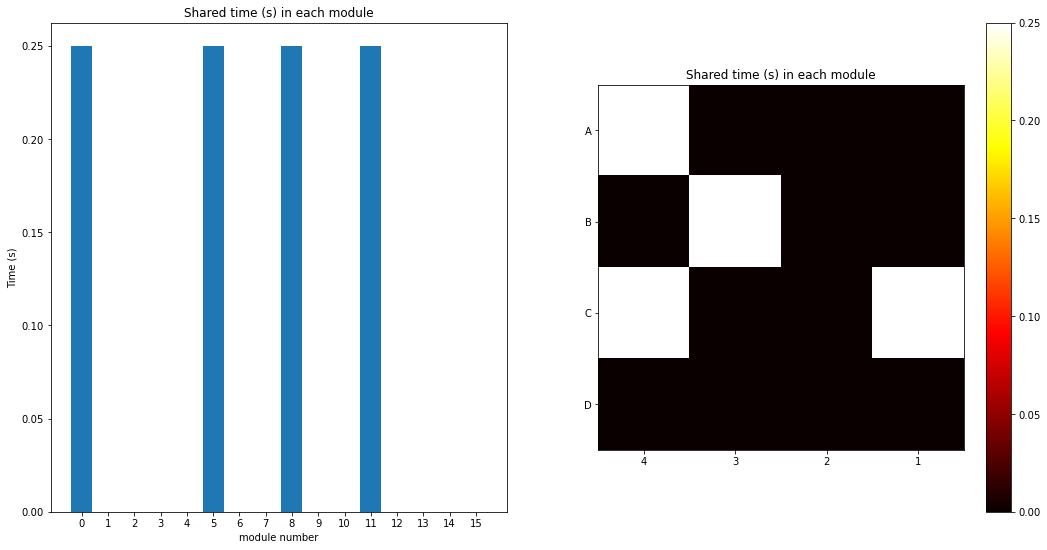

In [22]:
# plotting colormap and bars plot together
# https://stackoverflow.com/questions/18266642/multiple-imshow-subplots-each-with-colorbar/18278607
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,9))

ax1.bar(range(16), number_of_coinc)
ax1.set_title('Shared time (s) in each module')
ax1.set_xticks(np.arange(0, 16, 1))
ax1.set_ylabel('Time (s)')
ax1.set_xlabel('module number')

# Heat map for times per module
times_matrix = np.array(number_of_coinc).reshape(4, 4)
ax2.set_title('Shared time (s) in each module')
locations = (0, 1, 2, 3)
xlabels = ('4', '3', '2', '1')
plt.xticks(locations, xlabels)
ylabels = ('A', 'B', 'C', 'D')
plt.yticks(locations, ylabels)
cell_map = ax2.imshow(times_matrix, cmap='hot')
cbar = plt.colorbar(cell_map)
plt.draw()
